Using transfer learning , perform image classification of yoga poses.  
Pretrained model : ResNet50

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os
import cv2

In [3]:
from keras.preprocessing.image import ImageDataGenerator

resnet_preprocess = tf.keras.applications.resnet50.preprocess_input
##
image_path = "../input/yoga-poses-cgi/train"
test_path = "../input/yoga-poses-cgi/test"
##

train_data_gen = ImageDataGenerator(preprocessing_function = resnet_preprocess, validation_split = 0.2)
test_data_gen = ImageDataGenerator(preprocessing_function = resnet_preprocess)


##
train_ds = train_data_gen.flow_from_directory(image_path , target_size=(224, 224),
        batch_size=32 ,subset = 'training' , seed = 123 , class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')
val_ds = train_data_gen.flow_from_directory(image_path , target_size=(224, 224),
        batch_size=32 ,subset = 'validation' , seed = 123 , class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')

test_ds = test_data_gen.flow_from_directory(test_path ,target_size=(224, 224),
        batch_size=32 ,class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [4]:
labels = (train_ds.class_indices)
labels_dict = dict((v,k) for k,v in labels.items())
labels_dict

{0: 'chair', 1: 'cobra', 2: 'dog', 3: 'tree', 4: 'warrior'}

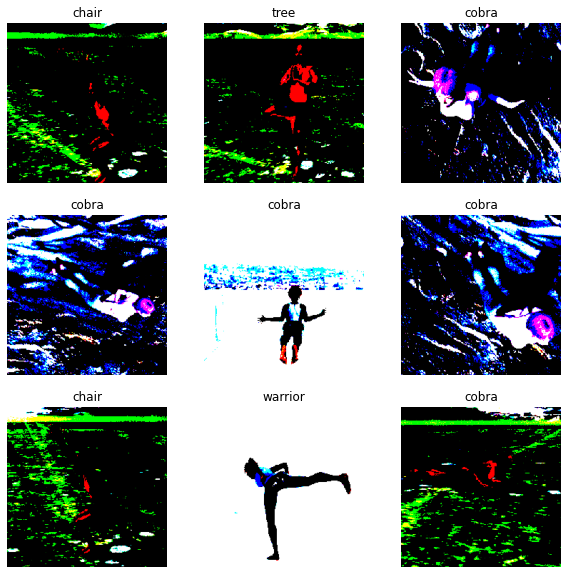

In [5]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")

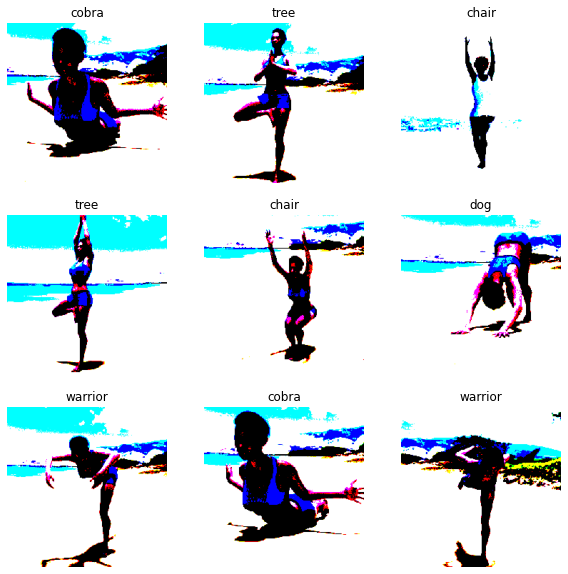

In [6]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(image_batch[i])
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")

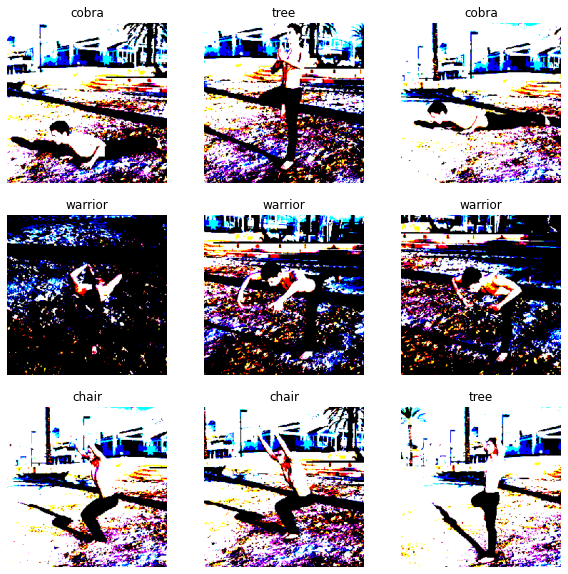

In [7]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(image_batch[i])
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")

2022-02-18 07:16:10.053634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 07:16:10.170034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 07:16:10.170827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 07:16:10.172442: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


2022-02-18 07:16:14.726460: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-18 07:16:18.457486: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 46.1 s, sys: 3.75 s, total: 49.8 s
Wall time: 55.5 s
25/25 [==============================] - 4s 177ms/step - loss: 0.7432 - accuracy: 0.7818
Test image accuracy :0.7818182110786438
25/25 [==============================] - 3s 82ms/step


2022-02-18 07:17:27.773377: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.83      0.50      0.62        76
       cobra       1.00      0.67      0.80       111
         dog       0.67      0.94      0.78        81
        tree       0.86      0.78      0.82        92
     warrior       0.70      0.98      0.81       103

    accuracy                           0.78       463
   macro avg       0.81      0.77      0.77       463
weighted avg       0.82      0.78      0.77       463



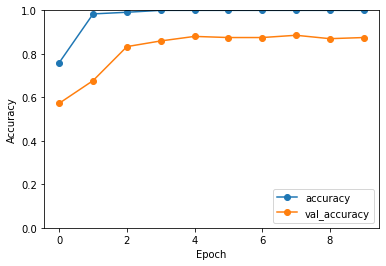

In [8]:
## Transfer learning with ResNet50 with dropout 

base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dropout(0.2))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

%time history = model_Net.fit(train_ds, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_ds,validation_steps=STEP_SIZE_VALID, epochs=10, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds, steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))

pred= model_Net.predict(test_ds,verbose=1, steps = STEP_SIZE_TEST, batch_size = 32)
##
predicted_class_indices=np.argmax(pred,axis=1)
##
labels = (train_ds.class_indices)
labels_dict = dict((v,k) for k,v in labels.items())
predictions = [labels_dict[k] for k in predicted_class_indices]
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_resnet50_1')
##
loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])

for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x, steps = STEP_SIZE_TEST), axis = -1)
    predicted = np.concatenate([predicted , predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
                            
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5125      
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________
CPU times: user 46.3 s, sys: 2.35 s, total: 48.6 s
Wall time: 46.6 s
25/25 [==============================] - 2s 79ms/step - loss: 1.3233 - accuracy: 0.7333
Test image accuracy :0.7333333492279053


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.38      0.55        82
       cobra       0.96      0.63      0.76       112
         dog       0.73      0.89      0.80        89
        tree       0.97      0.76      0.86        93
     warrior       0.52      0.96      0.67       104

    accuracy                           0.73       480
   macro avg       0.84      0.72      0.73       480
weighted avg       0.83      0.73      0.73       480



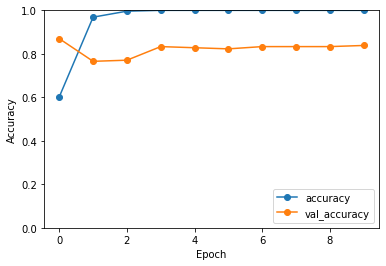

In [9]:
## Transfer learning with ResNet50 with out dropout 

base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

%time history = model_Net.fit(train_ds, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_ds,validation_steps=STEP_SIZE_VALID, epochs=10, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds, steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_resnet50_2')
##
loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])

for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x, steps = STEP_SIZE_TEST), axis = -1)
    predicted = np.concatenate([predicted , predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
                            
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________
CPU times: user 45.8 s, sys: 2.37 s, total: 48.2 s
Wall time: 46.2 s
25/25 [==============================] - 2s 81ms/step - loss: 0.9985 - accuracy: 0.7172
Test image accuracy :0.7171717286109924


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.79      0.62      0.69        78
       cobra       0.91      0.56      0.69       106
         dog       0.68      0.92      0.78        89
        tree       1.00      0.54      0.71        90
     warrior       0.56      0.94      0.70       100

    accuracy                           0.72       463
   macro avg       0.79      0.72      0.71       463
weighted avg       0.79      0.72      0.71       463



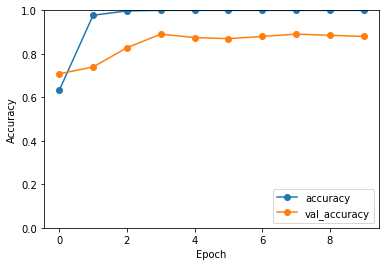

In [10]:
## Transfer learning with ResNet50 with 512 dense neurons

base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(512))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

%time history = model_Net.fit(train_ds, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_ds,validation_steps=STEP_SIZE_VALID, epochs=10, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds, steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_resnet50_3')
##
loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])

for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x, steps = STEP_SIZE_TEST), axis = -1)
    predicted = np.concatenate([predicted , predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
                            
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 5125      
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


CPU times: user 1min 27s, sys: 4.76 s, total: 1min 32s
Wall time: 1min 29s
25/25 [==============================] - 2s 79ms/step - loss: 1.2686 - accuracy: 0.7212
Test image accuracy :0.7212121486663818
Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.94      0.43      0.59        76
       cobra       1.00      0.35      0.51       113
         dog       0.52      0.94      0.67        85
        tree       0.86      0.98      0.91        92
     warrior       0.72      0.97      0.82        97

    accuracy                           0.73       463
   macro avg       0.81      0.73      0.70       463
weighted avg       0.82      0.73      0.70       463



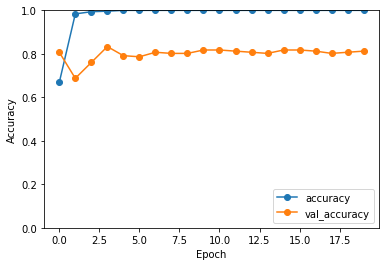

In [11]:
## Transfer learning with ResNet50 with 20 epochs 

base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()
model_Net.save('model_resnet50_4')

# Training the CNN on the Train data and evaluating it on the val data

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

%time history = model_Net.fit(train_ds, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_ds,validation_steps=STEP_SIZE_VALID, epochs=20, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds, steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))

##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])

for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x, steps = STEP_SIZE_TEST), axis = -1)
    predicted = np.concatenate([predicted , predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
                            
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 5125      
Total params: 26,740,613
Trainable params: 3,152,901
Non-trainable params: 23,587,712
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


CPU times: user 3min 33s, sys: 12.8 s, total: 3min 46s
Wall time: 3min 37s
25/25 [==============================] - 2s 79ms/step - loss: 1.5954 - accuracy: 0.6869
Test image accuracy :0.6868686676025391
Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.34      0.50        86
       cobra       0.93      0.48      0.63       115
         dog       0.65      0.96      0.77        77
        tree       0.88      0.66      0.76        89
     warrior       0.44      0.90      0.59        96

    accuracy                           0.65       463
   macro avg       0.78      0.67      0.65       463
weighted avg       0.79      0.65      0.65       463



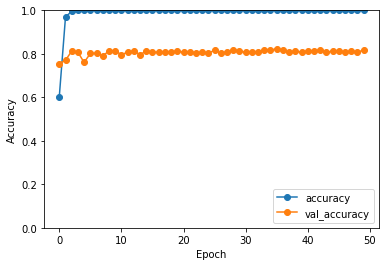

In [13]:
## Transfer learning with ResNet50 with two dense layers 

base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()
model_Net.save('model_resnet50_5')

# Training the CNN on the Train data and evaluating it on the val data

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

%time history = model_Net.fit(train_ds, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_ds,validation_steps=STEP_SIZE_VALID, epochs=50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds, steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))

##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])

for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x, steps = STEP_SIZE_TEST), axis = -1)
    predicted = np.concatenate([predicted , predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
                            
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

### Testing on new images of yoga poses

In [ ]:
## Load the best model and use it for predicting the new yoga poses. 
## These are downloaded from the internet for testing purposes.

In [14]:
## read in all the new test yoga poses and check the prediction 
test_path_2 = "../input/new-yoga-poses/yoga_test_data"
test_ds_2 = test_data_gen.flow_from_directory(test_path_2 ,target_size=(224, 224),
        batch_size=32 ,class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')

Found 26 images belonging to 5 classes.


In [26]:
model = tf.keras.models.load_model('./model_resnet50_1')
##
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.50      0.67         6
       cobra       0.80      0.80      0.80         5
         dog       0.50      0.80      0.62         5
        tree       0.71      1.00      0.83         5
     warrior       0.33      0.20      0.25         5

    accuracy                           0.65        26
   macro avg       0.67      0.66      0.63        26
weighted avg       0.68      0.65      0.63        26



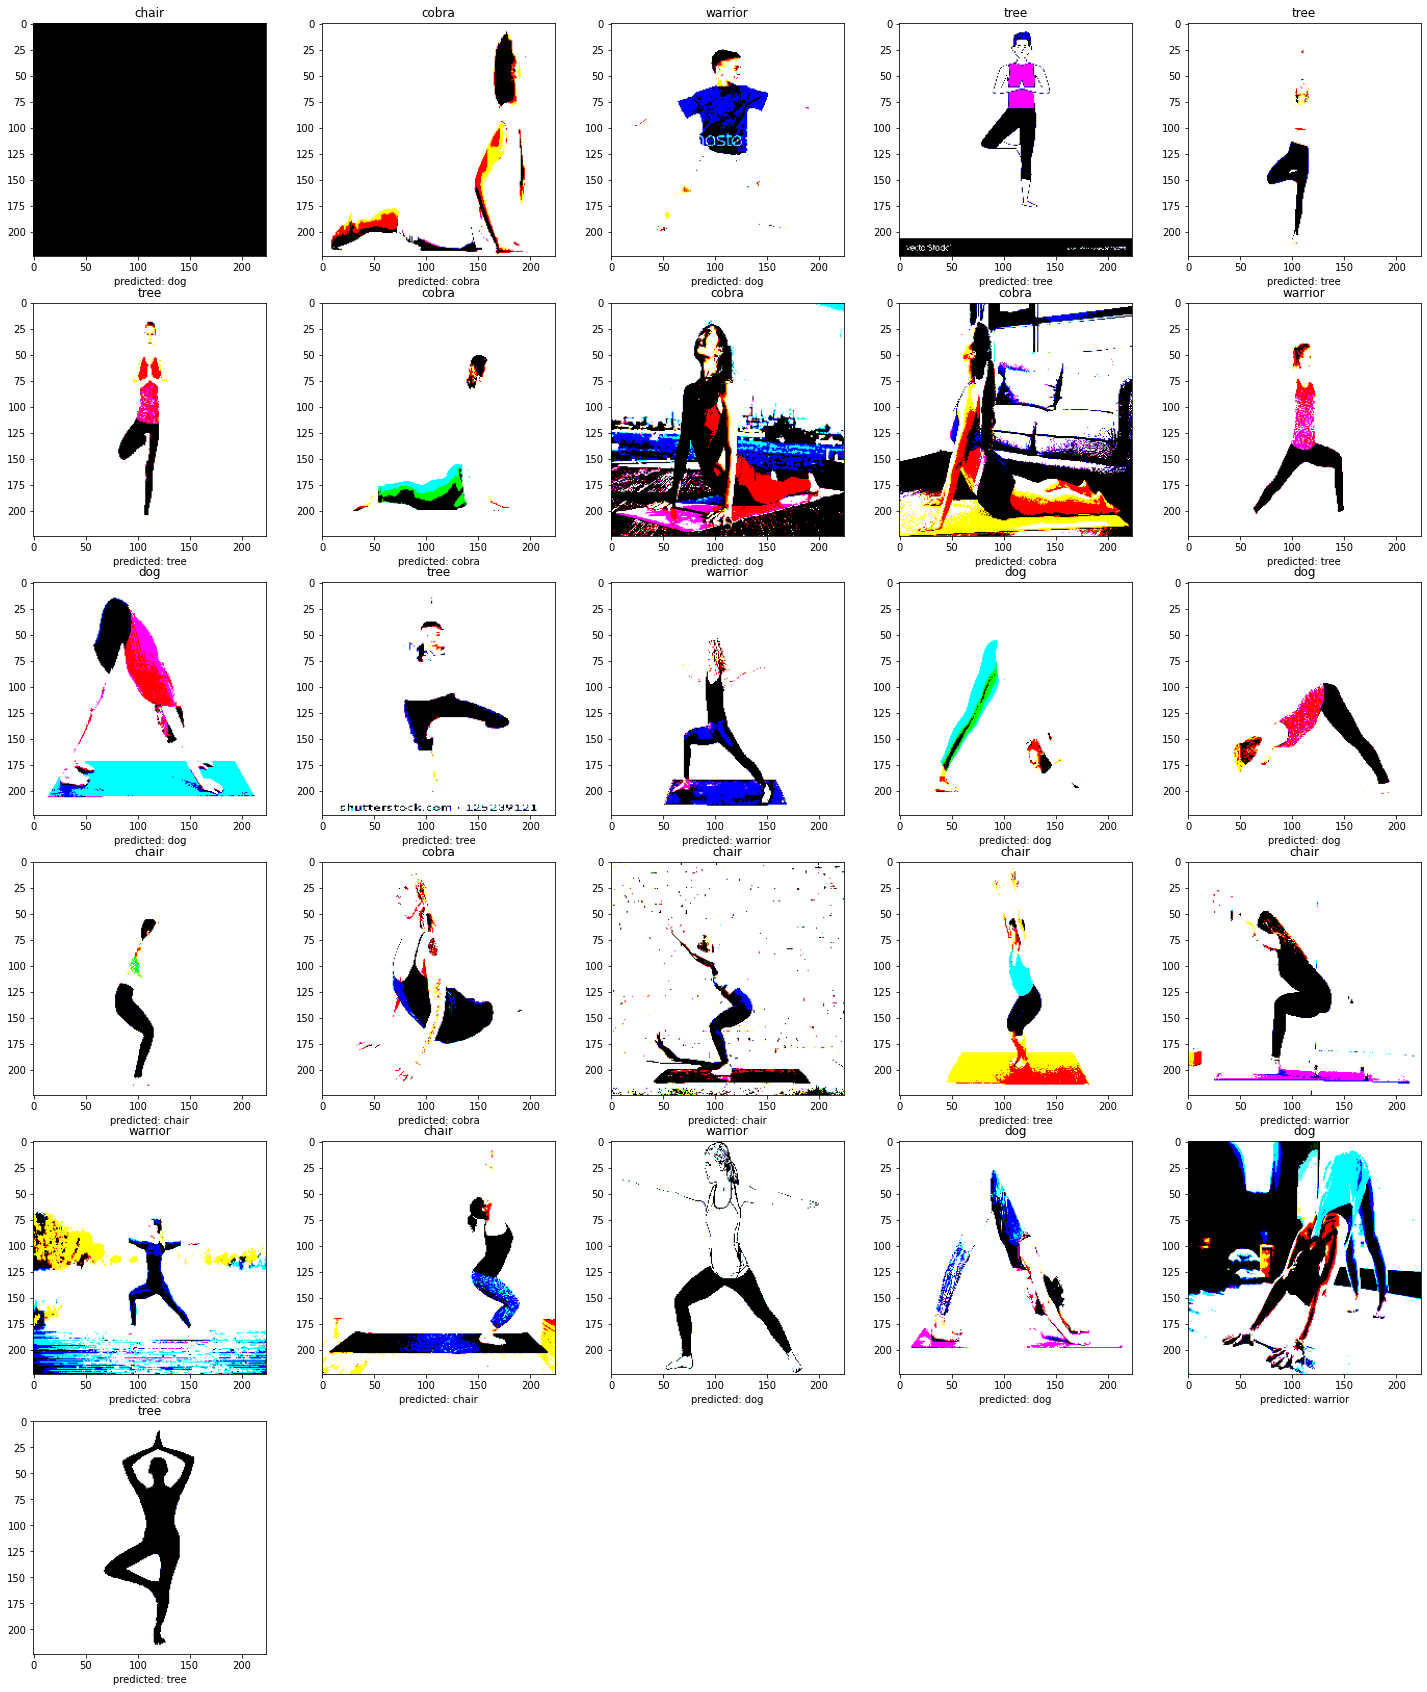

In [27]:
## visualize images with their prediction 
plt.figure(figsize=(25, 30))
for i in range(26):
    ax = plt.subplot(6, 5, i + 1)
    #plt.imshow(image_batch[i])
    plt.imshow(cv2.cvtColor(img[0][i], cv2.COLOR_BGR2RGB))
    label = actual[i]
    pred_label = predicted[i]
    name = labels_dict[label]
    plt.title(name)
    plt.xlabel('predicted: ' + labels_dict[pred_label])
    #plt.axis("off")

In [28]:
model = tf.keras.models.load_model('./model_resnet50_2')
##
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.00      0.00      0.00         6
       cobra       1.00      0.60      0.75         5
         dog       0.57      0.80      0.67         5
        tree       0.50      0.80      0.62         5
     warrior       0.38      0.60      0.46         5

    accuracy                           0.54        26
   macro avg       0.49      0.56      0.50        26
weighted avg       0.47      0.54      0.48        26



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
model = tf.keras.models.load_model('./model_resnet50_3')
##
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.17      0.29         6
       cobra       1.00      0.80      0.89         5
         dog       0.57      0.80      0.67         5
        tree       0.45      1.00      0.62         5
     warrior       0.33      0.20      0.25         5

    accuracy                           0.58        26
   macro avg       0.67      0.59      0.54        26
weighted avg       0.68      0.58      0.53        26



In [30]:
model = tf.keras.models.load_model('./model_resnet50_4')
##
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.00      0.00      0.00         6
       cobra       0.00      0.00      0.00         5
         dog       0.33      0.20      0.25         5
        tree       0.40      0.40      0.40         5
     warrior       0.29      1.00      0.45         5

    accuracy                           0.31        26
   macro avg       0.21      0.32      0.22        26
weighted avg       0.20      0.31      0.21        26



In [31]:
model = tf.keras.models.load_model('./model_resnet50_5')
##
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.50      0.17      0.25         6
       cobra       0.00      0.00      0.00         5
         dog       0.18      0.40      0.25         5
        tree       0.50      0.20      0.29         5
     warrior       0.17      0.20      0.18         5

    accuracy                           0.19        26
   macro avg       0.27      0.19      0.19        26
weighted avg       0.28      0.19      0.20        26



Summary :   
    
Transfer learning with ResNet50 gives best test image accuracy of 0.78.  
On the new images downloaded from the internet , which consists of non CGI origin , the accuracy is 0.65.  